# 1. Data Exploration:


In [43]:
#a. Load the dataset and perform EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#b. Examine features, data types, and summary statistics
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


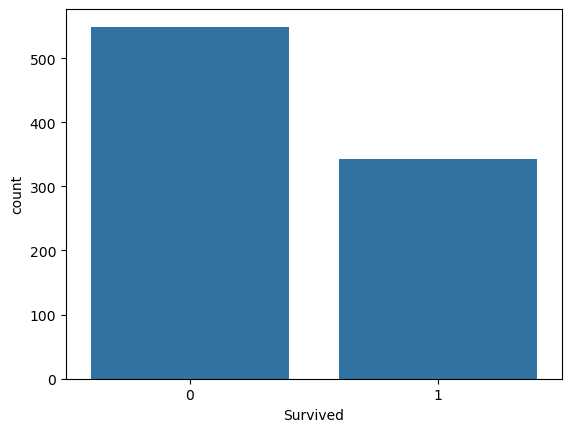

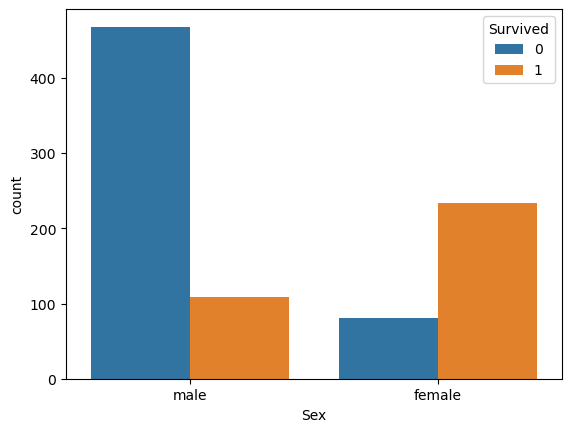

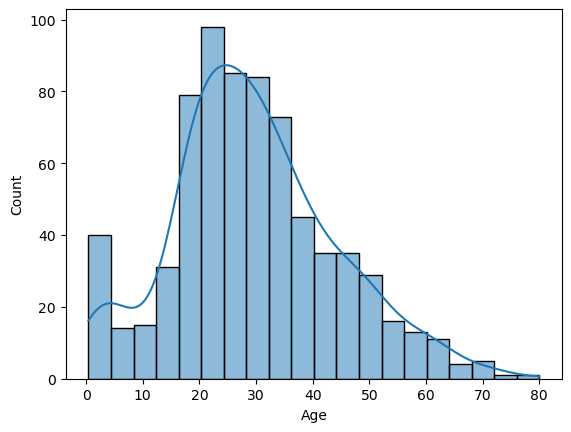

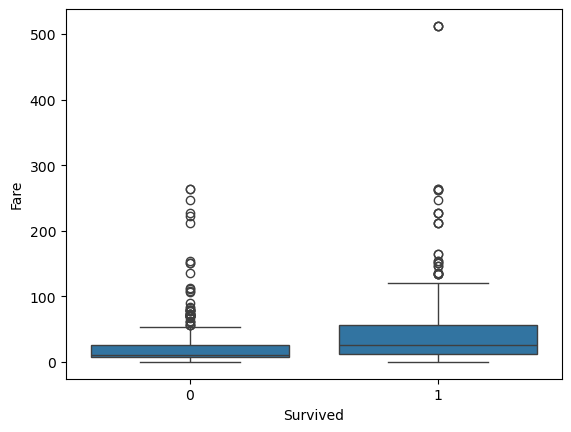

In [45]:
sns.countplot(x='Survived', data=train)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

sns.histplot(train['Age'], kde=True)
plt.show()

sns.boxplot(x='Survived', y='Fare', data=train)
plt.show()


#  2. Data Preprocessing

In [46]:
#a) Handle missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


In [47]:
#b) Encode categorical variables
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


# 3. Model Building

In [48]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
           'Embarked_Q', 'Embarked_S']]
y = train['Survived']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 4. Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC Score: 0.8826254826254826


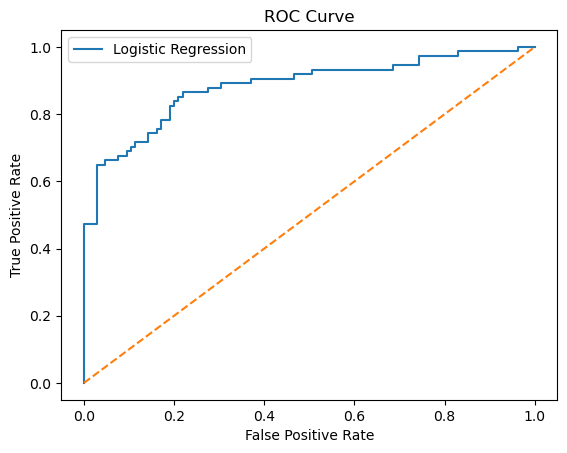

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# 5. Interpretation of Model 

In [52]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df


,Feature,Coefficient
0,Pclass,-0.938100
1,Sex,2.590404
2,Age,-0.030563
3,SibSp,-0.295076
4,Parch,-0.107737
5,Fare,0.002576
6,Embarked_Q,-0.112346
7,Embarked_S,-0.399464


#b) Interpretation

Positive coefficient → increases survival probability
Negative coefficient → decreases survival probability


Sex (female) : strong positive effect
Pclass : lower class decreases survival
Fare : higher fare increases survival
Age : older age slightly decreases survival

# 6. Deployment with Streamlit 

In [58]:
import pickle
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "model.pkl")


['model.pkl']

In [59]:
import streamlit as st
import pickle
import numpy as np


model = pickle.load(open("model.pkl", "rb"))

st.title("Titanic Survival Prediction")

pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["Male", "Female"])
age = st.number_input("Age", 1, 100)
fare = st.number_input("Fare", 0.0, 500.0)

sex = 0 if sex == "Male" else 1

input_data = np.array([[pclass, sex, age, fare]])

if st.button("Predict"):
    result = model.predict(input_data)
    if result[0] == 1:
        st.success("Passenger Survived")
    else:
        st.error("Passenger Did Not Survive")


In [55]:
!streamlit --version



Streamlit, version 1.37.1


# Interview Questions:

1. What is the difference between Precision and Recall?
Precision

Precision measures how many of the predicted positive cases are actually positive.
Precision=TP/(TP+FP)
Example:
If the model predicts 10 passengers survived and only 7 actually survived,
Precision = 7/10 = 70%
Used when:
False positives should be minimized (e.g., spam detection).

Recall

Recall measures how many actual positive cases were correctly identified by the model.


Recall=TP/(TP+FN)

Example:
If 10 passengers actually survived and the model correctly identifies 8,
Recall = 8/10 = 80%
Used when:
False negatives should be minimized (e.g., disease detection).

2. What is Cross-Validation, and why is it important in Binary Classification?
What is Cross-Validation?

Cross-validation is a technique used to evaluate a machine learning model by splitting the dataset into multiple folds, training the model on some folds and testing it on the remaining fold.

Example:
In k-fold cross-validation, the data is divided into k parts, and the model is trained and tested k times.

Why is it important in Binary Classification?
1:It reduces overfitting
2:Provides a more reliable estimate of model performance
Ensures the model generalizes well to unseen data
Especially useful for small or imbalanced datasets